In [12]:
import numpy as np
import pandas as pd
from scipy.spatial import distance
import matplotlib.pyplot as plt
from sklearn import datasets
import sklearn.cluster

np.random.seed(0)

def computecentroids(X,grouping):
    u = len(np.unique(grouping))
    s = np.zeros((u,X.shape[1]))
    count = np.zeros((u))
    for data,group in zip(X,grouping):
        group = int(group)
        s[group] = np.sum(np.vstack((s[group],data)) , axis = 0)
        count[group] += 1
    for i in range(len(count)):
        s[i] = s[i] / count[i]
    return s

def KMeans(X,k,max_iters=100):
    n = X.shape[0]
    if k > n:
        print('cluster size greater than given data')
    centroids = []
    """while len(centroids) != k:
        num = np.random.randint(0,n)
        if num in centroids:
            continue"""    
    centroids.append(0)
    for i in range(k-1):
        centroids.append(centroids[-1] + (n//k))
    centroids = np.array([X[i] for i in centroids])
    grouping = np.zeros((n))
    newgrouping = np.ones((n))
    iter = 0
    while(any(grouping != newgrouping) and (iter < max_iters)):
        iter += 1
        grouping = newgrouping
        newgrouping = np.ones((n))
        for i,row in enumerate(X):
            d = []
            for center in centroids:
                d.append(distance.euclidean(row,center))
            mindistcluster = np.argmin(d)
            newgrouping[i] = mindistcluster
        centroids = computecentroids(X,newgrouping)
        print('i',iter,centroids)
    print(grouping != newgrouping) and (iter < max_iters)
    return newgrouping , centroids

In [13]:
iris = datasets.load_iris()
X = iris.data[:, :]
y = iris.target

In [14]:
km = KMeans(X,3)

i 1 [[5.00566038 3.36981132 1.56037736 0.29056604]
 [6.05666667 2.79666667 4.48166667 1.44666667]
 [6.6972973  3.03243243 5.73243243 2.1       ]]
i 2 [[5.006      3.428      1.462      0.246     ]
 [5.91935484 2.75322581 4.39032258 1.41935484]
 [6.82105263 3.06578947 5.74736842 2.09473684]]
i 3 [[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
i 4 [[5.006      3.428      1.462      0.246     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]
 [6.85       3.07368421 5.74210526 2.07105263]]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False Fa

In [15]:
#Internal clustering metric : Davies Bouldin Score

from sklearn.metrics import davies_bouldin_score
print('DB Index score ',davies_bouldin_score(X , km[0]))

DB Index score  0.6619715465007486


c:\program files\python36\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [16]:
#Internal clustering metric : Silhouette Score

from sklearn.metrics import silhouette_score
print('Silhouette score ',silhouette_score(X , km[0]))

Silhouette score  0.5528190123564091


In [17]:
#External clustering metric :  Adjusted Rand index adjusted_mutual_info_score

from sklearn.metrics import adjusted_rand_score
print('Adjusted Rand index ',adjusted_rand_score(y , km[0]))

Adjusted Rand index  0.7302382722834697


In [18]:
#External clustering metric :  Adjusted Mutual Information

from sklearn.metrics import adjusted_mutual_info_score
print('Adjusted Mutual Information ',adjusted_mutual_info_score(y , km[0]))

Adjusted Mutual Information  0.7483723933229484


c:\program files\python36\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [19]:
from sklearn.metrics import confusion_matrix
print('The confusion matrix is\n',confusion_matrix(y , km[0]))

The confusion matrix is
 [[50  0  0]
 [ 0 48  2]
 [ 0 14 36]]


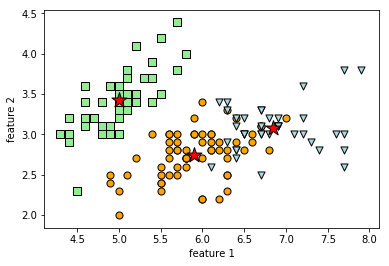

In [21]:
plt.scatter(X[km[0] == 0, 0],X[km[0] == 0, 1],s=50, c='lightgreen',marker='s', edgecolor='black',label='cluster 1') 
plt.scatter(X[km[0] == 1, 0],X[km[0] == 1, 1],s=50, c='orange',marker='o', edgecolor='black',label='cluster 2')
plt.scatter(X[km[0] == 2, 0],X[km[0] == 2, 1], s=50, c='lightblue',marker='v', edgecolor='black',label='cluster 3')
plt.scatter(km[1][:, 0], km[1][:, 1],s=250, marker='*',c='red', edgecolor='black',label='centroids')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [69]:
X = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/arcene/ARCENE/arcene_train.data",sep = ' ',header = None)
y = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/arcene/ARCENE/arcene_train.labels",sep = ' ',header = None)
X = X.values[0: , 0:-1]
y = np.squeeze(y.values,axis=1)
y[y == -1] = 0

In [70]:
np.unique(y)

array([0, 1], dtype=int64)

In [98]:
X = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data",sep = ',',header = None)
y = X.values[0:,-1]
X = X.values[: , 0:-1]
y[y == 1] = 0
y[y == 2] = 1

In [99]:
km = KMeans(X,2)

i 1 [[36.59574468 62.10638298  5.42553191]
 [55.33590734 62.98841699  3.77220077]]
i 2 [[39.92473118 62.5483871   4.67741935]
 [57.92957746 62.98591549  3.74178404]]
i 3 [[41.32173913 62.65217391  4.50434783]
 [59.16230366 62.97382199  3.7382199 ]]
i 4 [[42.59558824 62.60294118  4.06617647]
 [60.34705882 63.05294118  3.99411765]]
i 5 [[42.95070423 62.57746479  4.07042254]
 [60.68902439 63.09146341  3.98780488]]
i 6 [[42.95070423 62.57746479  4.07042254]
 [60.68902439 63.09146341  3.98780488]]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False Fal

In [55]:
np.unique

<function numpy.lib.arraysetops.unique(ar, return_index=False, return_inverse=False, return_counts=False, axis=None)>

In [100]:
#Internal clustering metric : Davies Bouldin Score

from sklearn.metrics import davies_bouldin_score
print('DB Index score ',davies_bouldin_score(X , km[0]))

DB Index score  0.9640249358317189


c:\program files\python36\lib\site-packages\sklearn\metrics\cluster\unsupervised.py:342: RuntimeWarning: divide by zero encountered in true_divide
  score = (intra_dists[:, None] + intra_dists) / centroid_distances


In [101]:
#Internal clustering metric : silhouette_score

from sklearn.metrics import silhouette_score
print('Silhouette score ',silhouette_score(X , km[0]))

Silhouette score  0.39408154965683956


In [102]:
#External clustering metric :  Adjusted Rand index adjusted_mutual_info_score

from sklearn.metrics import adjusted_rand_score
print('Adjusted Rand index ',adjusted_rand_score(y , km[0]))

Adjusted Rand index  -0.003697722054862106


In [103]:
#External clustering metric :  Adjusted Mutual Information

from sklearn.metrics import adjusted_mutual_info_score
print('Adjusted Mutual Information ',adjusted_mutual_info_score(y , km[0]))

Adjusted Mutual Information  -0.001312828779411744


c:\program files\python36\lib\site-packages\sklearn\metrics\cluster\supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


In [104]:
from sklearn.metrics import confusion_matrix
print('The confusion matrix is\n',confusion_matrix(y , km[0]))

The confusion matrix is
 [[107 118]
 [ 35  46]]


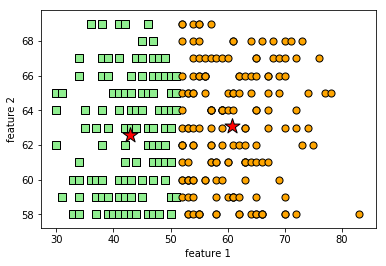

In [120]:
plt.scatter(X[km[0] == 0, 0],X[km[0] == 0, 1],s=50, c='lightgreen',marker='s', edgecolor='black',label='cluster 1') 
plt.scatter(X[km[0] == 1, 0],X[km[0] == 1, 1],s=50, c='orange',marker='o', edgecolor='black',label='cluster 2')
plt.scatter(km[1][:, 0], km[1][:, 1],s=250, marker='*',c='red', edgecolor='black',label='centroids')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.show()

In [180]:
from sklearn.cluster import SpectralClustering
clustering = SpectralClustering(n_clusters=2,assign_labels="discretize",random_state=0,gamma = 0.5)
y_pred = clustering.fit_predict(X)
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0]


In [174]:
print('The confusion matrix is\n',confusion_matrix(y , y_pred))

The confusion matrix is
 [[102 123]
 [ 36  45]]


In [160]:
np.sum(y==0)

225